# PCA example

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import datasets
import matplotlib.pyplot as plt
  

In [3]:
from sklearn.datasets import load_digits
# Load the digits data
digits = load_digits()
X = digits.data
y = digits.target
print(y[1])
X[1]

1


array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

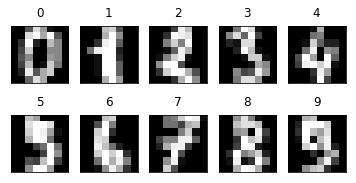

In [4]:
# Just for demostration purposes, let's see some images.
nrows, ncols = 2, 5
plt.figure(figsize=(6,3));
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([]);
    plt.title(digits.target[i]);
plt.show()

Text(0.5,1,'Top 2 Principal Components')

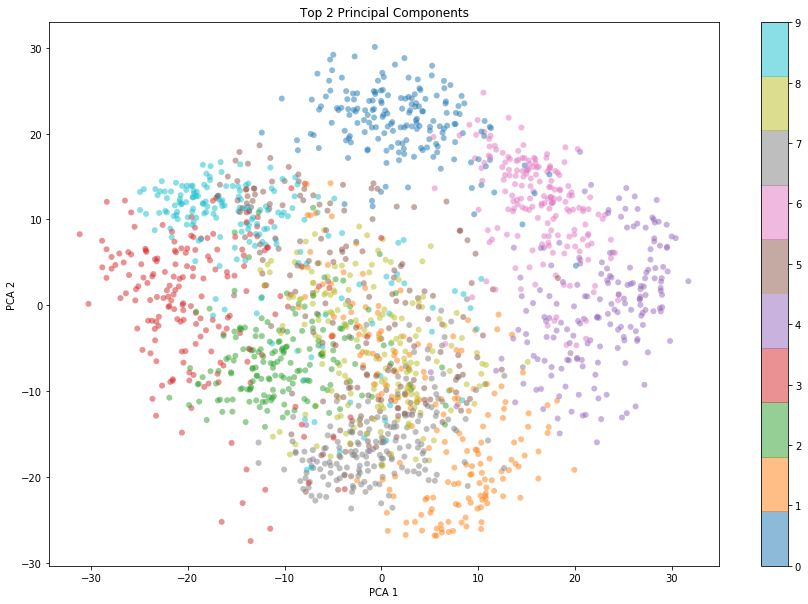

In [5]:
# Select only the first 2 principal components
pca = PCA(2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(digits.data)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,cmap='tab10')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar();
plt.title("Top 2 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')

In [6]:
from mpl_toolkits import mplot3d

Text(0.5,0.92,'Top 3 Principal Components')

<Figure size 1080x720 with 0 Axes>

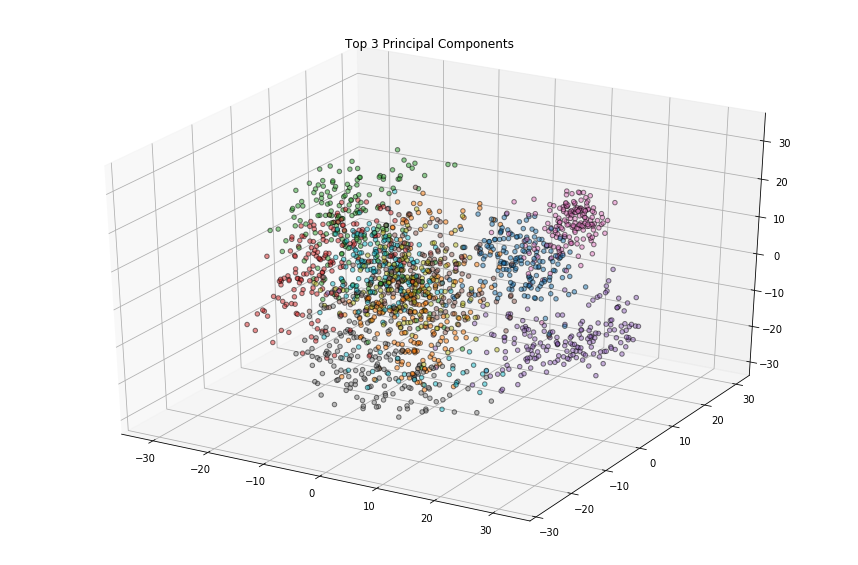

In [7]:
pca = PCA(3)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = pca.fit_transform(digits.data)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2],
            c=digits.target, edgecolor='none', alpha=0.5,cmap='tab10')
plt.title("Top 3 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')

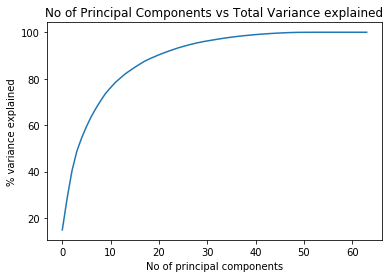

In [8]:
pca = PCA(64)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
varianceExp= pca.explained_variance_ratio_
# Compute the total sum of variance
totVarExp=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# Plot the variance explained as a function of the number of principal components
plt.plot(totVarExp)
plt.xlabel('No of principal components')
plt.ylabel('% variance explained')
plt.title('No of Principal Components vs Total Variance explained')
plt.savefig('fig2.png', bbox_inches='tight')

C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5,1,'Top 2 Principal Components')

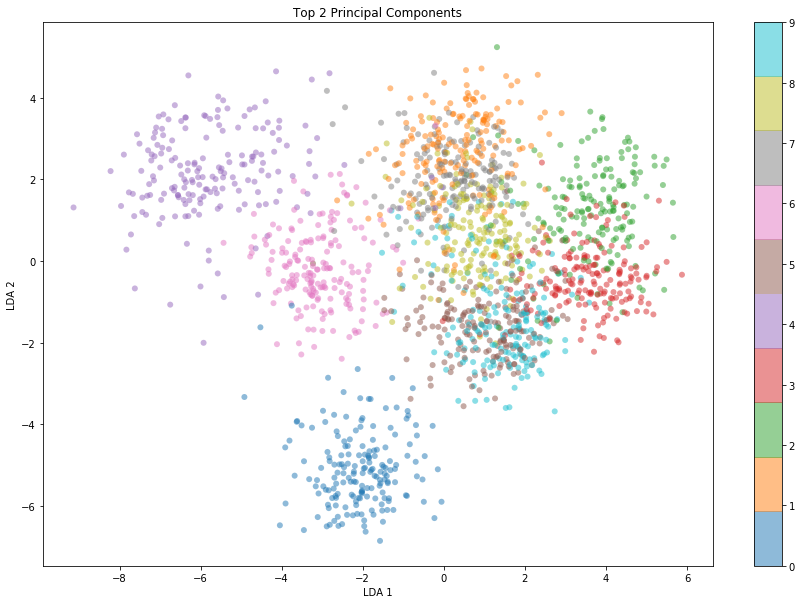

In [9]:
# Select only the first 2 principal components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)  # project from 64 to 2 dimensions
#Compute the first 2 PCA
projected = lda.fit_transform(digits.data,digits.target)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,cmap='tab10')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.colorbar();
plt.title("Top 2 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')

C:\Users\Inanna\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0.5,0.92,'Top 3 Principal Components')

<Figure size 1080x720 with 0 Axes>

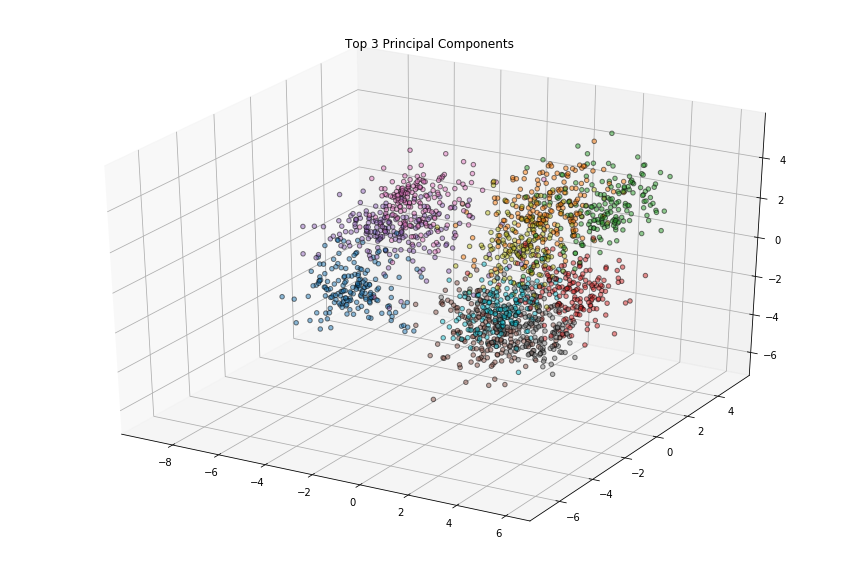

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)  # project from 64 to 2 dimensions

projected = lda.fit_transform(digits.data,digits.target)

# Plot a scatter plot of the first 2 principal components
plt.figure(figsize=(15, 10))

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(projected[:, 0], projected[:, 1],projected[:, 2],
            c=digits.target, edgecolor='none', alpha=0.5,cmap='tab10')
plt.title("Top 3 Principal Components")
#plt.savefig('fig1.png', bbox_inches='tight')

conda install ipyvolume


In [11]:
import ipyvolume as ipv
from matplotlib import colors
import matplotlib

cmap = colors.ListedColormap(digits.target)
#[name for name, color in cmap.items()]
c = matplotlib.cm.tab10(np.linspace(0, 1, 10))
colors = [c[i] for i in digits.target]

fig = ipv.pylab.figure()
scater = ipv.scatter(projected[:, 0], projected[:, 1],projected[:, 2], color=colors, marker = 'sphere',edgecolor='none', alpha=0.5,cmap='tab10')
ipv.pylab.show()


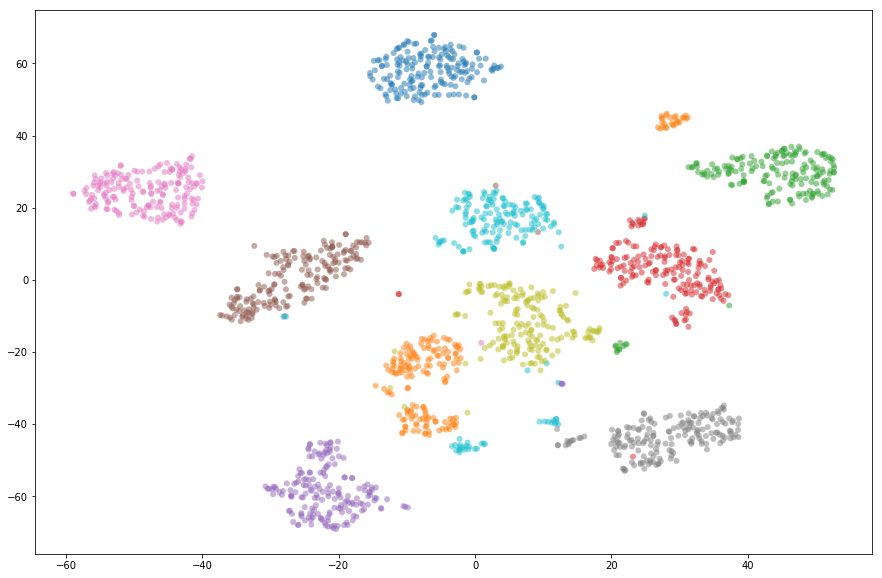

In [14]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(digits.data)
plt.figure(figsize=(15, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,cmap='tab10')

In [15]:
X_embedded = TSNE(n_components=3).fit_transform(digits.data)
fig = ipv.pylab.figure()
scater = ipv.scatter(X_embedded[:, 0], X_embedded[:, 1],X_embedded[:, 2], color=colors, marker = 'sphere',edgecolor='none', alpha=0.5,cmap='tab10')
ipv.pylab.show()

# Feature Selection

In [16]:
variances = [X[:,p].std() for p in range(64)]

In [17]:
image = np.reshape(variances,(8,8))
image

array([[0.        , 0.90693964, 4.75350317, 4.24765948, 4.28619491,
        5.66484088, 3.32484969, 1.03709417],
       [0.09419533, 3.19527098, 5.41994694, 3.97643575, 4.78134964,
        6.05127561, 3.58532293, 0.82768465],
       [0.06235094, 3.57530605, 5.68918332, 5.80104695, 6.17400993,
        6.19559718, 3.25896254, 0.43847543],
       [0.03334258, 3.14565685, 6.19031469, 5.88129939, 6.15038083,
        5.87092136, 3.68543009, 0.04712725],
       [0.        , 3.4794038 , 6.32292731, 6.26664682, 5.93183902,
        5.86901393, 3.53629836, 0.        ],
       [0.14514503, 2.98098645, 6.53613529, 6.43958504, 6.25776954,
        5.69394162, 4.32974601, 0.30727036],
       [0.20416633, 1.74566694, 5.64292531, 5.22549314, 5.30057302,
        6.02947606, 4.91803706, 0.98412698],
       [0.02358333, 0.9340418 , 5.1015993 , 4.37347662, 4.93257433,
        5.89898069, 4.08940957, 1.85960409]])

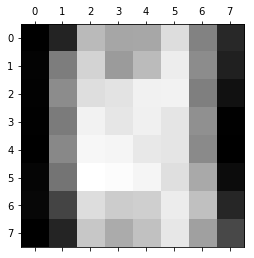

In [18]:
plt.matshow(image)


# Data transformation

In [19]:
from sklearn import preprocessing
# Normalization and Scaling 
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(X)
Xn=scaler.transform(X)
#Xtn=scaler.transform(X_test)      
Xn


array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [20]:
scaler2 = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(X)
Xn=scaler2.transform(X)      
#Xtn=scaler.transform(X_test) 
print(np.max(Xn))
print(np.min(Xn))
Xn


1.0
0.0


array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [21]:
# Si nomes volem una column,a no tot. i és index de columna
i=1
scalerP1 = preprocessing.MinMaxScaler(copy=False,feature_range=(0, 1)).fit(X[:,i].reshape(-1, 1))
scalerP1.transform(X[:,i].reshape(-1, 1))    
print(np.max(X[:,1]))
print(np.min(X[:,1]))
X


1.0
0.0


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
# Binarization: Numeric to boolean
binarizer = preprocessing.Binarizer(threshold=0.0).fit(X)
Xn = binarizer.transform(X)
Xn


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.]])

# Encoding

In [24]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
from pandas.tools import plotting
import numpy as np

URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names=['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", 'Target']
df = pandas.read_csv(URL, sep=',', na_values=" ?",header=None,names=names)
df=df.drop(labels='fnlwgt',axis=1)
df.head(n=10)




,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [25]:
pandas.get_dummies(df, drop_first=True).head()


,Age,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Target_ >50K
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
pandas.get_dummies(df, columns=["Education"]).head()

,Age,Workclass,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,...,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,1,0,0,0,0,0,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,1,0,0,0,0,0,0


# Importance of normalization

In [30]:
import pandas as pd

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
    header=None,
    )
X_wine = df.values[:,1:]
y_wine = df.values[:,0]

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_wine)
X_wine_std = std_scale.transform(X_wine)

# on data from 
pca = PCA(n_components=2).fit(X_wine)
X_train = pca.transform(X_wine)


# om standardized data
pca_std = PCA(n_components=2).fit(X_wine_std)
X_train_std = pca_std.transform(X_wine_std)



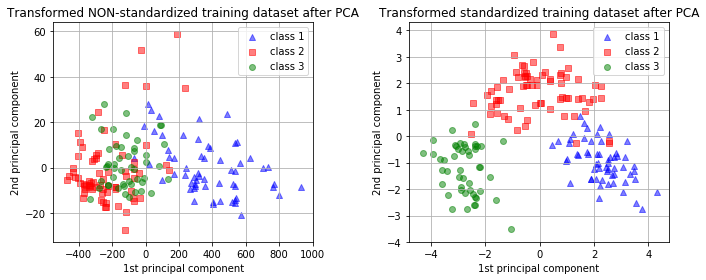

In [32]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_wine==l, 0], X_train[y_wine==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_wine==l, 0], X_train_std[y_wine==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  